### Imports & Options

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import random
import pickle
from copy import copy

In [4]:
from PIL import Image, ImageDraw
from rtree import index
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append("../")

In [6]:
from stippling import Stipple
from ant_manager import Optimize
from ant import Ant
from plotting_tools import plot_path, plot_graph
from utils import window

### Stippling

In [7]:
filename = "../images/ame.png"
lite_stippling = Stipple(original_filename = filename)
lite_stippling.place_dots(20)

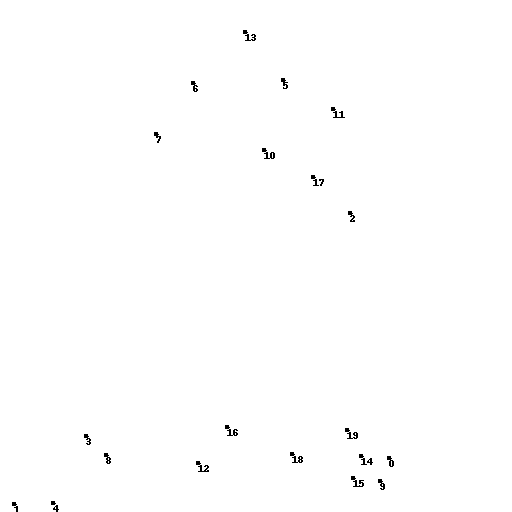

In [8]:
lite_stippling.draw_points(radius=2, include_ids=True)

### Ants

**Notes**
* On a graph of 20 nodes there are 190 edges.

In [110]:
optimization = Optimize(lite_stippling.chosen_points, 20, evaporation_rate=0.1, deposition_rate=0.5)

The graph has 20 nodes and 190 edges.


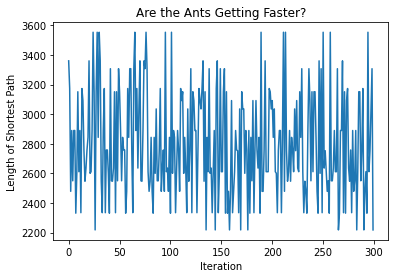

In [115]:
fastest_ant = optimization.optimize(num_iterations=100)
optimization.plot_convergence()

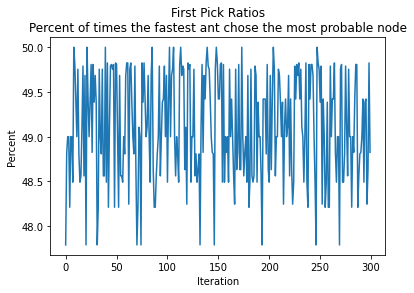

In [116]:
optimization.plot_first_pick_ratios()

In [94]:
billy = optimization.fastest_ants[1]
billy.path

[18, 4, 15, 3, 9, 16, 1, 0, 6, 19, 5, 14, 12, 13, 17, 8, 2, 7, 11, 10, 18]

In [96]:
sum(billy.first_picks)/len()

14

In [77]:
# first_node = billy.path[0]
node = 16
df = billy.history[node].sort_values(by="Selection Probabilities", ascending=False)
df

,Distances,Distance Probs,Pheromone Levels,Pheromone Probs,Selection Probabilities
Next Node,,,,,
9,57.723479,0.102364,0.4,1.0,1.102364
3,84.172442,0.095479,0.0,0.0,0.095479
5,88.408144,0.094376,0.0,0.0,0.094376
12,96.130120,0.092366,0.0,0.0,0.092366
15,108.784190,0.089071,0.0,0.0,0.089071
6,132.306462,0.082948,0.0,0.0,0.082948
13,155.467038,0.076919,0.0,0.0,0.076919
19,157.407115,0.076414,0.0,0.0,0.076414
14,159.906223,0.075763,0.0,0.0,0.075763


In [85]:
billy.history[8].index[0]

0

In [90]:
first_picks = []
for n1, n2 in window(billy.path):
    df = billy.history[n1].sort_values(by="Selection Probabilities", ascending=False)
    did_it_choose_the_most_probable = n2 == df.index[0]
    first_picks.append(did_it_choose_the_most_probable)

In [ ]:
# Let's track this ratio
sum(first_picks)/len(first_picks)

In [106]:
sorted([1, 2, 3, 3, 7, 4, 5, 3 ,7])

[1, 2, 3, 3, 3, 4, 5, 7, 7]

In [107]:
test = [1, 6, 5, 3, 7, 1, 3, 9, 3, 4, 5, 3]

In [109]:
test.index(max(test))

7